# Preliminaries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sys.path.append("/Users/paolo/Documents/methods/CMI_FS")
from feature_selection import forwardFeatureSelection

sys.path.append("/Users/paolo/Documents/methods/LinCFA")
from LinCFA import LinCFA

sys.path.append("/Users/paolo/Documents/Droughts/Paolo/regression_LinCFA")
from aux import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,FS_with_linearWrapper,compare_methods


In [11]:
def plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []
    colors = cm.rainbow(np.linspace(0,1,len(output)))
    np.random.shuffle(colors)
    fig, ax = plt.subplots(2)
    ax[0].set_xlim(xmin,xmax)
    ax[1].set_xlim(xmin,xmax)
    ax[0].set_ylim(ymin,ymax)
    ax[1].set_ylim(ymin,ymax)
    for i in range(len(output)): 
        #print(len(output[i]))
        x = []
        y = []
        
        for datum in output[i]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[0].scatter(x,y,color=colors[i])
    
    x = []
    y = []
    col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
    for i in range(len(selected_colnames)): 
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[idx]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[1].scatter(x,y,color=col[i])
    

# Target 

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))


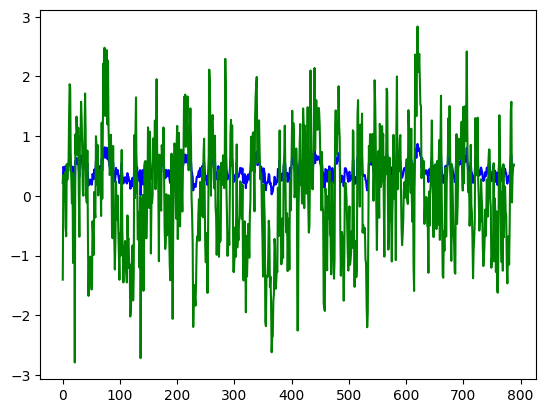

In [4]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')
plt.plot(target_df_trainVal.loc[:,'mean'], color='blue')
plt.plot(target_df_trainVal.loc[:,'mean_std'], color='green')

# 1) Only contemporary week: temperature, precipitation, both

## temperature

### full data

In [5]:
import glob
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'
filenames = glob.glob(path + "/*.csv")

df = []
for file in filenames:
    df.append(pd.read_csv(file))
    
df = pd.concat(df, ignore_index=True)
print(min(df.x),max(df.x),min(df.y),max(df.y))
df

6.649860364384157 12.949860339180924 43.74986055078544 46.54986054189981


,date,y,x,year,week,cyclostationary_mean_tg,cyclostationary_mean_rr,cyclostationary_mean_tg_1w,cyclostationary_mean_tg_4w,cyclostationary_mean_tg_8w,cyclostationary_mean_tg_12w,cyclostationary_mean_tg_16w,cyclostationary_mean_tg_24w,cyclostationary_mean_rr_1w,cyclostationary_mean_rr_4w,cyclostationary_mean_rr_8w,cyclostationary_mean_rr_12w,cyclostationary_mean_rr_16w,cyclostationary_mean_rr_24w
0,2001-01-05,43.749861,12.14986,2001,1,2.009904,3.832692,2.009904,2.009904,2.009904,2.009904,2.009904,2.009904,3.832692,3.832692,3.832692,3.832692,3.832692,3.832692
1,2001-01-05,43.749861,12.24986,2001,1,2.067019,5.870192,2.067019,2.067019,2.067019,2.067019,2.067019,2.067019,5.870192,5.870192,5.870192,5.870192,5.870192,5.870192
2,2001-01-05,43.749861,12.34986,2001,1,1.852115,6.747115,1.852115,1.852115,1.852115,1.852115,1.852115,1.852115,6.747115,6.747115,6.747115,6.747115,6.747115,6.747115
3,2001-01-05,43.749861,12.44986,2001,1,1.326058,6.315385,1.326058,1.326058,1.326058,1.326058,1.326058,1.326058,6.315385,6.315385,6.315385,6.315385,6.315385,6.315385
4,2001-01-05,43.749861,12.54986,2001,1,0.919712,5.876923,0.919712,0.919712,0.919712,0.919712,0.919712,0.919712,5.876923,5.876923,5.876923,5.876923,5.876923,5.876923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972166,2022-06-24,45.149861,9.94986,2022,25,2.690385,-2.800962,2.272010,2.329204,1.385630,0.870501,1.147244,0.936656,-1.272072,-1.413951,-1.272724,-1.360520,-1.324643,-1.008920
972167,2022-06-24,45.149861,10.04986,2022,25,3.044231,-2.908654,2.598934,2.706495,1.759349,1.269219,1.527790,1.217671,-1.620804,-1.550787,-1.354406,-1.371571,-1.327258,-1.002166
972168,2022-06-24,45.249861,9.54986,2022,25,3.776635,-1.676923,3.400022,3.327979,2.531039,1.964117,2.186415,1.916099,-0.938462,-1.116958,-1.169462,-1.253882,-1.240283,-1.040775
972169,2022-06-24,45.249861,9.84986,2022,25,3.044519,-2.306731,2.604873,2.643358,1.767176,1.255820,1.511847,1.283886,-1.231774,-1.335385,-1.283196,-1.366569,-1.330153,-1.049503


In [6]:
df.columns

Index(['date', 'y', 'x', 'year', 'week', 'cyclostationary_mean_tg',
       'cyclostationary_mean_rr', 'cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w', 'cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],
      dtype='object')

In [8]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal,multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 133

actual training score: 0.14535721368732524
actual validation score: 0.31589361878551825, number of remaining columns: 131

actual training score: 0.15831694051711953
actu

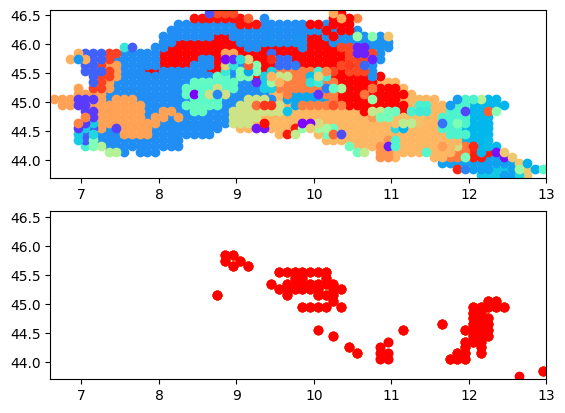

In [16]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

0
1
2
3
5
9
14
16
17
27
28
29
34
37
42
45
49
50
51
53
55
59
60
63
67
69
70
72
73
74
75
79
88
93
94
95
97
120
Number of features: 38


actual training score: 0.1788179812120797
actual validation score: 0.25991582699231697, number of remaining columns: 36

actual training score: 0.19054891521550266
actual validation score: 0.2741436221315058, number of remaining columns: 35

actual training score: 0.19253828285172447
actual validation score: 0.27940316459897585, number of remaining columns: 34

actual training score: 0.19363950085129134
actual validation score: 0.2835887564591596, number of remaining columns: 33

actual training score: 0.19918379817996423
actual validation score: 0.2899616179009007, number of remaining columns: 32

actual training score: 0.20465642404038142
actual validation score: 0.295204906370229, number of remaining columns: 31

actual training score: 0.20691415757683462
actual validation score: 0.30006870506126104, number of remaining columns: 30

actual training sc

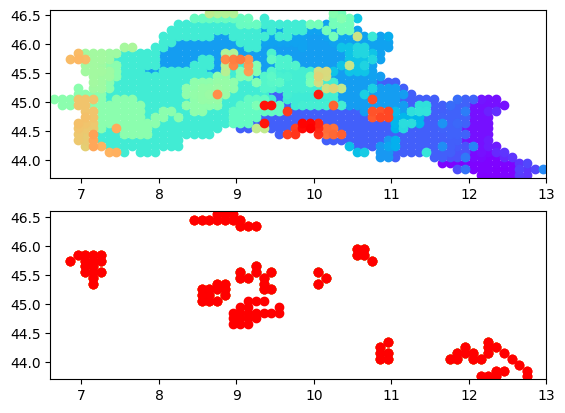

In [10]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)
        
print(f'Number of features: {aggregate_trainVal.iloc[:,ii].shape[1]}\n\n')

selected_colnames_3 = FS_with_linearWrapper(aggregate_trainVal.iloc[:,ii], target_df_train, target_df_val, 35)

compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames_3)

plot_cells(output,selected_colnames_3, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

Full aggregate regression train score: 0.30036888253707417, test score: 0.003924128902192847
Aggregate regression train score with FS: 0.21751561003556252, test score: -0.05880863218924692
Full aggregate regression train score: 0.30036888253707417, test score: 0.003924128902192847
Aggregate regression train score with FS: 0.23407335740413604, test score: -0.08709933079466414


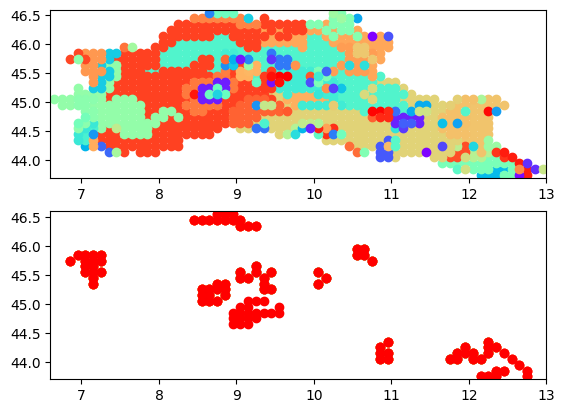

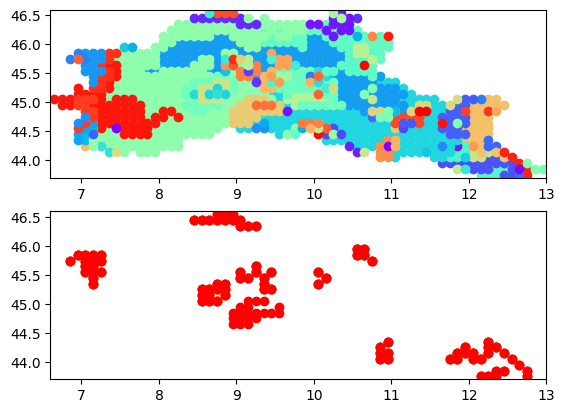

In [20]:
### forcing a low number of features
compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames_3[0:5])

plot_cells(output,selected_colnames_3, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames_3[0:10])

plot_cells(output,selected_colnames_3, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)


### not considering last years

In [21]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 154

actual training score: 0.13353229126954447
actual validation score: 0.2120356125416959, number of remaining columns: 152

actual training score: 0.151082857949298
actual 

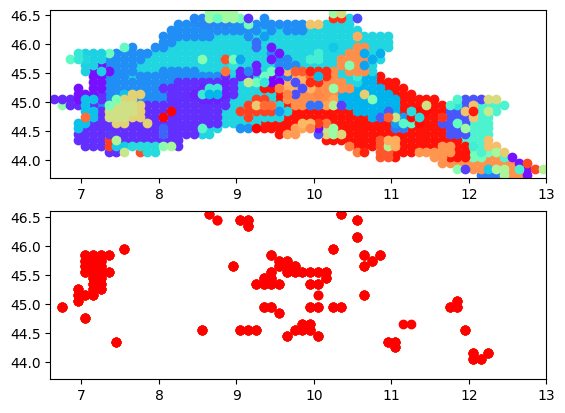

In [24]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

Full aggregate regression train score: 0.5532918006984423, test score: -0.42495462116789384
Aggregate regression train score with FS: 0.2324647941725212, test score: 0.11054693592955445
Full aggregate regression train score: 0.5532918006984423, test score: -0.42495462116789384
Aggregate regression train score with FS: 0.26409043388139175, test score: 0.046062766439747715


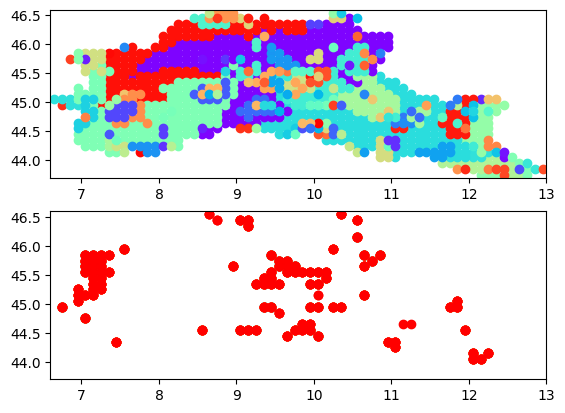

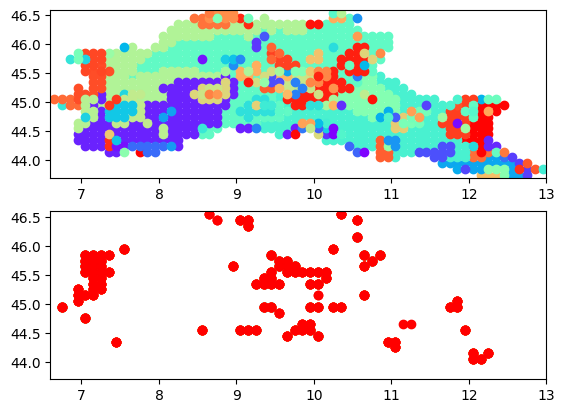

In [27]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)


### repeat both with CMI FS

In [28]:
### all data
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal,multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 133

----- MI Scores -----
[(65, 0.14093398314237146), (116, 0.13369491633190958), (53, 0.1315120231757229), (59, 0.13102456207150906), (67, 0.12768733641285576), (103, 0.1272

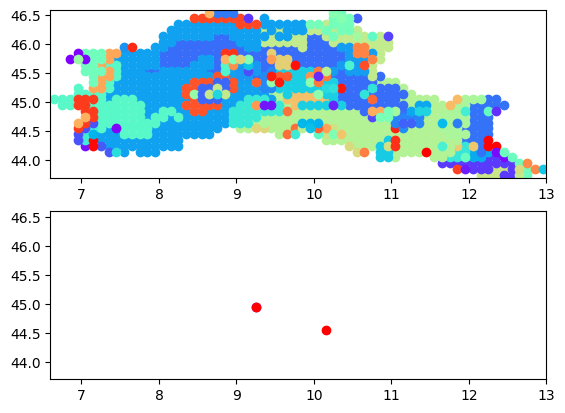

In [29]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

In [31]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 154

----- MI Scores -----
[(73, 0.14254955357731547), (61, 0.14213477079075912), (108, 0.1377844018351225), (55, 0.13685162638816048), (109, 0.13370736679082068), (32, 0.1334

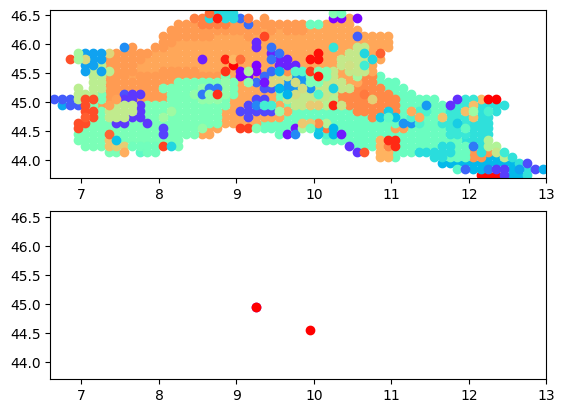

In [32]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

0
1
2
3
6
8
13
17
18
24
28
30
31
32
35
41
48
51
52
55
56
59
60
61
65
70
72
74
80
81
82
83
84
86
90
91
102
104
110
116
Number of features: 40


----- MI Scores -----
[(23, 0.14213477079075912), (19, 0.13685162638816048), (13, 0.1334036301074694), (24, 0.12464026304523891), (27, 0.1127388441226296), (15, 0.11165296291164822), (33, 0.11004692370223715), (11, 0.10951676783052859), (39, 0.10901614815575042), (17, 0.10887819273499635), (25, 0.1075176501645943), (10, 0.10708933782129003), (7, 0.10273022536712494), (29, 0.10217773496127439), (36, 0.10206696542512059), (38, 0.10060621275742238), (12, 0.1000150896823334), (22, 0.09940808948104715), (18, 0.09891722208340499), (34, 0.09517559671524525), (20, 0.09405970185774669), (37, 0.09310461135464691), (1, 0.08813629178680966), (26, 0.08796368006117511), (14, 0.08769531101594863), (16, 0.0866371566109605), (30, 0.08541225590904673), (2, 0.08255332938093998), (28, 0.0818747118544332), (21, 0.08174016674422133), (32, 0.08148653418470819), (9, 0.

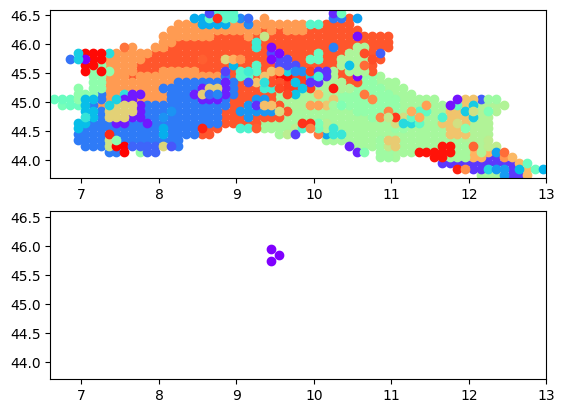

In [35]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)
        
print(f'Number of features: {aggregate_trainVal.iloc[:,ii].shape[1]}\n\n')

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal.iloc[:,ii]),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames_3 = aggregate_trainVal.iloc[:,ii].columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames_3)

plot_cells(output,selected_colnames_3, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)


## precipitation

### full data

In [36]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal,multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 73

actual training score: 0.0791778524815836
actual validation score: 0.07852889252216644, number of remaining columns: 71

actual training score: 0.08248429499312149
actual 

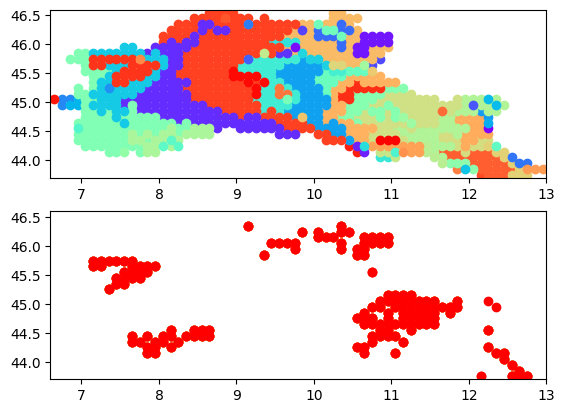

In [37]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

1
2
3
5
6
11
12
14
15
18
21
22
23
24
25
27
28
29
32
39
42
44
45
47
48
51
52
53
54
55
56
58
59
61
67
68
Number of features: 36


actual training score: 0.0745840848885041
actual validation score: 0.07342397941110157, number of remaining columns: 34

actual training score: 0.07609386488735648
actual validation score: 0.07864688188331304, number of remaining columns: 33

actual training score: 0.0763540790120597
actual validation score: 0.08321271921749351, number of remaining columns: 32

actual training score: 0.09039632616636228
actual validation score: 0.08540750951718279, number of remaining columns: 31

actual training score: 0.09180961937387688
actual validation score: 0.09431981178331628, number of remaining columns: 30

actual training score: 0.0919646756354
actual validation score: 0.09598594754820755, number of remaining columns: 29

actual training score: 0.09210104845568112
actual validation score: 0.09555505988830304, number of remaining columns: 28

actual training score: 0

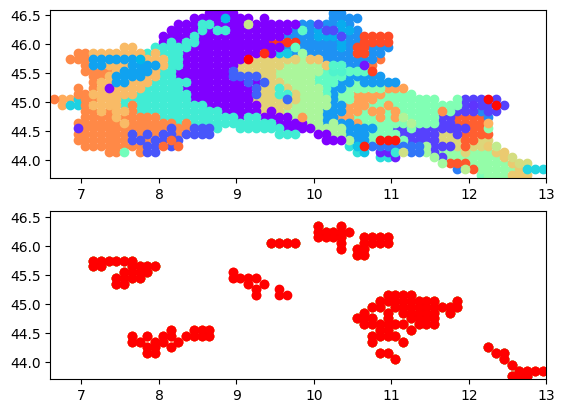

In [38]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)
        
print(f'Number of features: {aggregate_trainVal.iloc[:,ii].shape[1]}\n\n')

selected_colnames_3 = FS_with_linearWrapper(aggregate_trainVal.iloc[:,ii], target_df_train, target_df_val, 35)

compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames_3)

plot_cells(output,selected_colnames_3, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

Full aggregate regression train score: 0.20838904292041882, test score: -0.05758769074679271
Aggregate regression train score with FS: 0.0947041098384186, test score: 0.13144624412054784
Full aggregate regression train score: 0.20838904292041882, test score: -0.05758769074679271
Aggregate regression train score with FS: 0.10423870632505483, test score: 0.11468528728254168


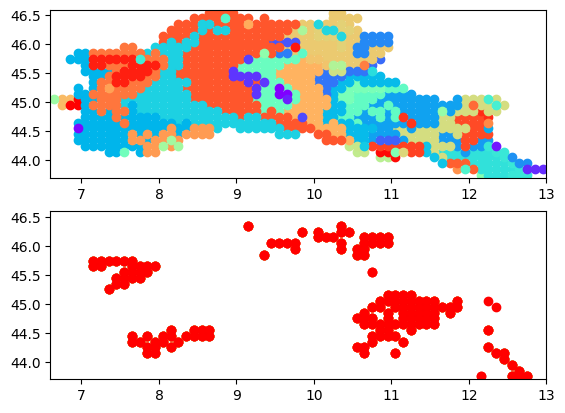

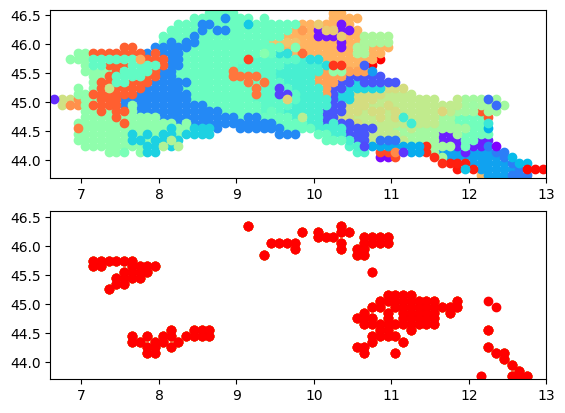

In [39]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)


### not considering last years

In [40]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 73

actual training score: 0.073267709881499
actual validation score: 0.0067712837720284025, number of remaining columns: 71

actual training score: 0.07503167898441665
actual

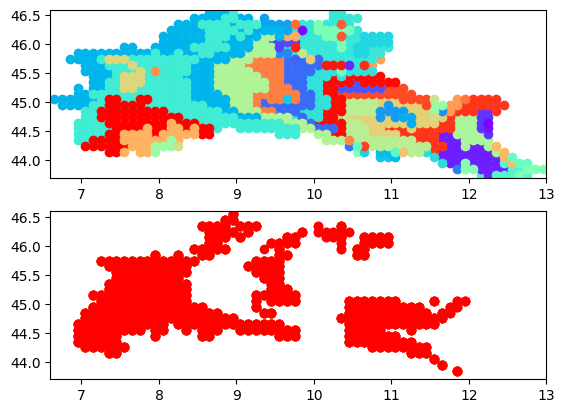

In [41]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

Full aggregate regression train score: 0.24472586343086233, test score: -0.2155525762161845
Aggregate regression train score with FS: 0.098712719007642, test score: 0.025227234094443052
Full aggregate regression train score: 0.24472586343086233, test score: -0.2155525762161845
Aggregate regression train score with FS: 0.10950057077759368, test score: -0.037070812229788475


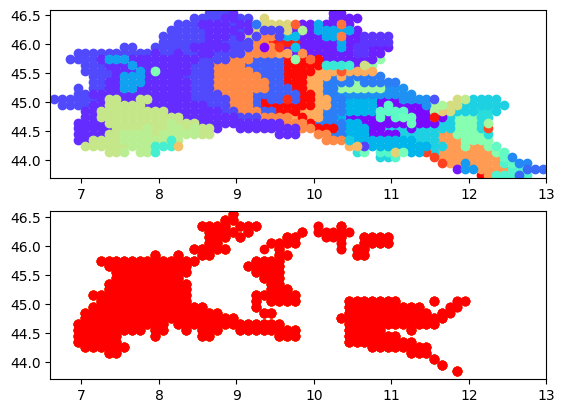

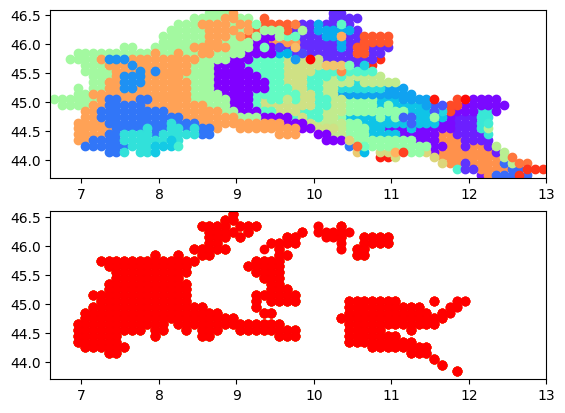

In [42]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)


### repeat both with CMI FS

In [43]:
### all data
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal,multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 73

----- MI Scores -----
[(22, 0.08536317579374685), (12, 0.07301053267792824), (15, 0.06799557451969171), (21, 0.06782700784737576), (31, 0.06613354386804646), (25, 0.062165

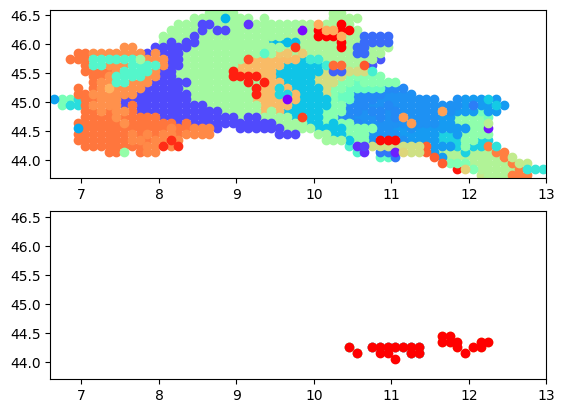

In [44]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

In [45]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 73

----- MI Scores -----
[(15, 0.07944619674144797), (69, 0.07919816591699666), (32, 0.07897283385814786), (16, 0.07845259561980408), (10, 0.07373359985016323), (71, 0.073265

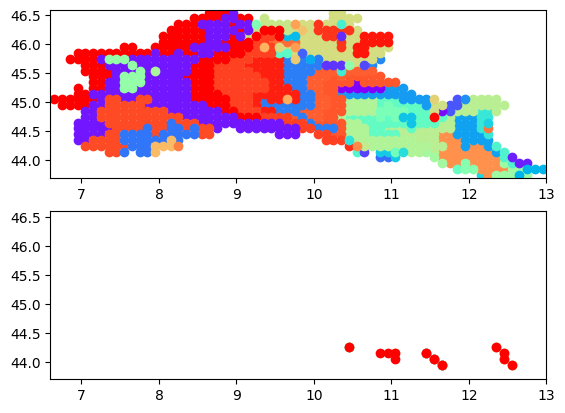

In [46]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

## both

### full data

In [48]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal,multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 133

Number of features: 991

Number of aggregated features: 73

actual training score: 0.14535721368732524
actual validation score: 0.31589361878551825, number of remaining c

In [51]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)
        
print(f'Number of features: {aggregate_trainVal.iloc[:,ii].shape[1]}\n\n')

selected_colnames_3 = FS_with_linearWrapper(aggregate_trainVal.iloc[:,ii], target_df_train, target_df_val, 35)

compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames_3)


1
2
3
5
6
11
12
14
15
18
21
22
23
24
25
27
28
29
32
39
42
44
45
47
48
51
52
53
54
55
56
58
59
61
67
68
Number of features: 36


actual training score: 0.17319018643210082
actual validation score: 0.2823993950116579, number of remaining columns: 34

actual training score: 0.17474198529969642
actual validation score: 0.2851484671872959, number of remaining columns: 33

actual training score: 0.18860353978884314
actual validation score: 0.2965395203443135, number of remaining columns: 32

actual training score: 0.1909885469324708
actual validation score: 0.30447061387396945, number of remaining columns: 31

actual training score: 0.19707896369077282
actual validation score: 0.31817130456198006, number of remaining columns: 30

actual training score: 0.19771536669889578
actual validation score: 0.32452438145604345, number of remaining columns: 29

actual training score: 0.1983281056979832
actual validation score: 0.3293596051662582, number of remaining columns: 28

actual training score: 0

In [53]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])



Full aggregate regression train score: 0.5470238348197174, test score: -0.5661913652111861
Aggregate regression train score with FS: 0.2193472509483837, test score: -0.07950543074967054
Full aggregate regression train score: 0.5470238348197174, test score: -0.5661913652111861
Aggregate regression train score with FS: 0.249755382118371, test score: -0.06155155818560076


### not considering last years

In [54]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 154

Number of features: 991

Number of aggregated features: 73

actual training score: 0.13353229126954447
actual validation score: 0.2120356125416959, number of remaining co

In [55]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])



Full aggregate regression train score: 0.6192496569834187, test score: -0.7363380166831368
Aggregate regression train score with FS: 0.2324647941725212, test score: 0.11054693592955445
Full aggregate regression train score: 0.6192496569834187, test score: -0.7363380166831368
Aggregate regression train score with FS: 0.26409043388139175, test score: 0.046062766439747715


### repeat both with CMI FS

In [56]:
### all data
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal,multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 133

Number of features: 991

Number of aggregated features: 73

----- MI Scores -----
[(65, 0.14093398314237146), (116, 0.13369491633190958), (53, 0.1315120231757229), (59, 0

CMI: 0.0011635506739166301
CMI: 0.013449433090647667
CMI: 0.03077580310744954
CMI: 0.017849382463884844
CMI: 0.021312585836284592
CMI: 0.0029366236117167044
CMI: 0.003329813171706386
CMI: 0.004531491128211329
CMI: 0.0008946529580883267
CMI: 0.013531621486327416
CMI: 0.008593692740563263
CMI: 0.0031197472148428163
CMI: 0.020003587411035112
CMI: 0.003247255707617386
CMI: 0.017771918651745156
CMI: 0.02872974694969671
CMI: 0.0022374653222313468
CMI: 0.019485754982492887
CMI: 0.024312409349081437
CMI: 0.025828436111608843
CMI: 0.024495326983346777
CMI: 0.004219668786390129
CMI: 0.020156383250556242
CMI: 0.006465405137292185
CMI: 0.011047832780446187
CMI: 0.01431761405827875
CMI: 0.015715504579808554
CMI: 0.029605117461256047
CMI: 0.002628639428014057
CMI: 0.005078415370161543
CMI: 0.002267608269936744
CMI: 0.010631251111295176
CMI: 0.028322282613494343
CMI: 0.027568458897693188
CMI: 0.011381994003182933
CMI: 0.0006146284228726595
CMI: 6.733077623591321e-05
CMI: 0.004262108872573833
CMI: 0.0

In [57]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 154

Number of features: 991

Number of aggregated features: 73

----- MI Scores -----
[(73, 0.14254955357731547), (61, 0.14213477079075912), (108, 0.1377844018351225), (55, 0

CMI: 0.011688669929711515
CMI: 0.02268860435351977
CMI: 0.018923089693516748
CMI: 0.008224622973404955
CMI: 0.004845012734537191
CMI: 0.008218322583010751
CMI: 0.004807900532607795
CMI: 0.0017065433893719006
CMI: 0.02017542375927142
CMI: 0.005552479872308086
CMI: 0.028621039845033586
CMI: 0.006966706524326544
CMI: 0.004222610334991744
CMI: 0.0021242303363041837
CMI: 0.03849797404114014
CMI: 0.00978832127370563
CMI: 0.030188300780909505
CMI: 0.0019558158947793614
CMI: 0.011318510128873999
CMI: 2.6576647397968944e-05
CMI: 0.0021597939584014347
CMI: 0.011731939185381263
CMI: 0.01155506185842231
CMI: 0.008388513987551555
CMI: 0.0007617959919094808
CMI: 0.0034798107300405
CMI: 0.006629353587670389
CMI: 0.024219769771379684
CMI: 0.011624887683443719
CMI: 0.0038788429123247092
CMI: 0.0005194979022218327
CMI: 0.00045309487052866415
CMI: 0.0018357488292763957
CMI: 0.005416917223382223
CMI: 0.000528583588673387
CMI: 0.00013030848320716437
CMI: 0.0033595155703496915
CMI: 0.01451611133261696
CMI: 

# 

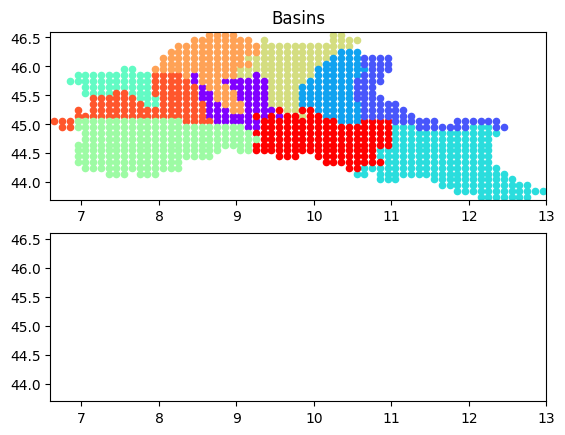

In [6]:
names = ['Adda_aggreg.csv','Lambro_Olona_aggreg.csv','Dora_aggreg.csv','Oglio_Iseo_aggreg.csv',
         'Emiliani1_aggreg.csv','Piemonte_Nord_aggreg.csv','Emiliani2_aggreg.csv','Piemonte_Sud_aggreg.csv',
         'Garda_Mincio_aggreg.csv','Ticino_aggreg.csv']
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/'
import glob,os
xmin=6.6
xmax=13
ymin=43.7
ymax=46.6
colors = cm.rainbow(np.linspace(0,1,10))
np.random.shuffle(colors)
fig, ax = plt.subplots(2)
ax[0].set_xlim(xmin,xmax)
ax[1].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
ax[1].set_ylim(ymin,ymax)
ax[0].set_title("Basins")
for i in range(10):
    x=[]
    y=[]
    path_file = path+names[i]
    df = pd.read_csv(path_file)
    vals = df.groupby(['x','y']).count().index.values
    for j in range(len(vals)):
        x.append(vals[j][0])
        y.append(vals[j][1])
    ax[0].scatter(x,y,color=colors[i], s=20)

# 

## Emiliani 2, contemporary week:
## tests:
full data: max_train='2013-11-22', max_val='2018-04-10', max_test='2022-06-24'<br>
without last years: max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01'<br>
<br>
### temperature:
991 original features --> 133 aggregations with neighbours --> 25 wrapper FS<br>
train score:0.283, validation score: 0.43, test score: -0.16<br>
<br>
Without last years: 154 aggregations with neighbours --> 41 wrapper FS<br>
train score:0.553, validation score: 0.45, test score: 0.23<br>

### precipitation:
130 original features --> 24 aggregations with neighbours --> 5 wrapper FS<br>
train score:0.066, validation score: 0.039, test score: 0.065<br>
<br>
Without last years: 28 aggregations with neighbours --> 5 wrapper FS<br>
train score:0.0727, validation score: 0.010, test score: 0.058<br>

### both:
130+130 original features --> 42+24 aggregations with neighbours --> 24 wrapper FS<br>
train score:0.2358, validation score: 0.329, test score: 0.019<br>
<br>
Without last years: 41+28 aggregations with neighbours --> 29 wrapper FS<br>
train score:0.264, validation score: 0.29, test score: 0.186<br>
